Load the Numeric Dataset (CSV)

In [ ]:
import pandas as pd
from google.colab import files
uploaded = files.upload()

numeric_df = pd.read_csv(next(iter(uploaded.keys())))
numeric_df.head()


Saving CDR-Call-Details.csv to CDR-Call-Details.csv


,Phone Number,Account Length,VMail Message,Day Mins,Day Calls,Day Charge,Eve Mins,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,isFraud
0,382-4657,128,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,371-7191,107,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,358-1921,137,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,375-9999,84,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,330-6626,75,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import numpy as np
import numpy as np
import librosa
import librosa.display
from sklearn.metrics import precision_recall_curve, accuracy_score, classification_report
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier, VotingClassifie
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import StackingClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from collections import Counter
from sklearn.naive_bayes import MultinomialNB
from sklearn.preprocessing import MinMaxScaler

Preprocess the Numeric Data

In [ ]:
missing_values = numeric_df.isnull().sum()
print("Missing values in each column:\n", missing_values)
numeric_df = numeric_df.drop('Phone Number', axis=1)

# Encode any categorical variables if needed (in this case, the 'isFraud' column)
numeric_df['isFraud'] = numeric_df['isFraud'].astype(int)
numeric_df.head()


Missing values in each column:
 Phone Number      0
Account Length    0
VMail Message     0
Day Mins          0
Day Calls         0
Day Charge        0
Eve Mins          0
Eve Calls         0
Eve Charge        0
Night Mins        0
Night Calls       0
Night Charge      0
Intl Mins         0
Intl Calls        0
Intl Charge       0
CustServ Calls    0
isFraud           0
dtype: int64


,Account Length,VMail Message,Day Mins,Day Calls,Day Charge,Eve Mins,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,isFraud
0,128,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,107,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,137,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,84,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,75,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0


Normalize the Data

In [ ]:
scaler = MinMaxScaler()
numeric_features = numeric_df.drop('isFraud', axis=1)
numeric_df_scaled = scaler.fit_transform(numeric_features)

numeric_df_scaled = pd.DataFrame(numeric_df_scaled, columns=numeric_features.columns)
numeric_df_scaled['isFraud'] = numeric_df['isFraud'].values
numeric_df_scaled.head()


,Account Length,VMail Message,Day Mins,Day Calls,Day Charge,Eve Mins,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,isFraud
0,0.006016,0.022502,0.002386,0.005211,0.040531,0.001777,0.004689,0.079155,0.002020,0.003366,0.047278,0.047192,0.014218,0.226510,0.090909,0
1,0.005021,0.023402,0.001454,0.005826,0.024703,0.001759,0.004879,0.078400,0.002107,0.003935,0.049365,0.064653,0.014218,0.310403,0.090909,0
2,0.006442,0.000000,0.002191,0.005400,0.037213,0.001091,0.005211,0.048587,0.001281,0.003983,0.029780,0.057574,0.023697,0.276007,0.000000,0
3,0.003932,0.000000,0.002695,0.003363,0.045774,0.000557,0.004168,0.024812,0.001590,0.003272,0.037083,0.031147,0.033175,0.149329,0.181818,0
4,0.003505,0.000000,0.001500,0.005353,0.025486,0.001335,0.005779,0.059484,0.001500,0.004789,0.034949,0.047664,0.014218,0.229027,0.272727,0


In [ ]:
# Split the data into features (X) and target (y)
X = numeric_df_scaled.drop('isFraud', axis=1)
y = numeric_df_scaled['isFraud']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(X_train, y_train)

y_pred = svm_model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.8970595502841611
Classification Report:
               precision    recall  f1-score   support

           0       0.90      1.00      0.95     18152
           1       0.00      0.00      0.00      2083

    accuracy                           0.90     20235
   macro avg       0.45      0.50      0.47     20235
weighted avg       0.80      0.90      0.85     20235



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Class Weight Adjustment

In [ ]:
# Initialize and train the SVM model with balanced class weights
svm_model_weighted = SVC(kernel='linear', class_weight='balanced', random_state=42)
svm_model_weighted.fit(X_train, y_train)
y_pred_weighted = svm_model_weighted.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred_weighted))
print("Classification Report:\n", classification_report(y_test, y_pred_weighted))


Accuracy: 0.7857672349888807
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.85      0.88     18152
           1       0.14      0.21      0.17      2083

    accuracy                           0.79     20235
   macro avg       0.52      0.53      0.52     20235
weighted avg       0.83      0.79      0.80     20235



In [ ]:
subset_size = 0.1
numeric_df_subset = numeric_df_scaled.sample(frac=subset_size, random_state=42)

# Split the subset into features (X) and target (y)
X_subset = numeric_df_subset.drop('isFraud', axis=1)
y_subset = numeric_df_subset['isFraud']
X_train_subset, X_test_subset, y_train_subset, y_test_subset = train_test_split(X_subset, y_subset, test_size=0.2, random_state=42)

# Apply SMOTE to the training data
X_train_smote_subset, y_train_smote_subset = smote.fit_resample(X_train_subset, y_train_subset)


In [ ]:
rf_model_subset = RandomForestClassifier(random_state=42)
rf_model_subset.fit(X_train_smote_subset, y_train_smote_subset)

y_pred_rf_subset = rf_model_subset.predict(X_test_subset)

print("Accuracy:", accuracy_score(y_test_subset, y_pred_rf_subset))
print("Classification Report:\n", classification_report(y_test_subset, y_pred_rf_subset))

Accuracy: 0.9095849802371542
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.98      0.95      1806
           1       0.65      0.34      0.45       218

    accuracy                           0.91      2024
   macro avg       0.79      0.66      0.70      2024
weighted avg       0.90      0.91      0.90      2024



In [ ]:
rf_model = RandomForestClassifier(random_state=42)
gb_model = GradientBoostingClassifier(random_state=42)

# Combine the models using a Voting Classifier
voting_model = VotingClassifier(estimators=[
    ('rf', rf_model),
    ('gb', gb_model)
], voting='soft')

voting_model.fit(X_train_smote_subset, y_train_smote_subset)
y_pred_voting = voting_model.predict(X_test_subset)

print("Accuracy:", accuracy_score(y_test_subset, y_pred_voting))
print("Classification Report:\n", classification_report(y_test_subset, y_pred_voting))


Accuracy: 0.9031620553359684
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.97      0.95      1806
           1       0.59      0.33      0.42       218

    accuracy                           0.90      2024
   macro avg       0.76      0.65      0.69      2024
weighted avg       0.89      0.90      0.89      2024



In [ ]:
base_models = [
    ('rf', RandomForestClassifier(random_state=42)),
    ('gb', GradientBoostingClassifier(random_state=42))
]
meta_model = LogisticRegression(random_state=42)

# Create the Stacking Classifier
stacking_model = StackingClassifier(estimators=base_models, final_estimator=meta_model, cv=5)


In [ ]:
stacking_model.fit(X_train_smote_subset, y_train_smote_subset)
y_pred_stacking = stacking_model.predict(X_test_subset)

# Evaluate the stacking model
print("Accuracy:", accuracy_score(y_test_subset, y_pred_stacking))
print("Classification Report:\n", classification_report(y_test_subset, y_pred_stacking))


Accuracy: 0.9100790513833992
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.97      0.95      1806
           1       0.64      0.38      0.47       218

    accuracy                           0.91      2024
   macro avg       0.78      0.68      0.71      2024
weighted avg       0.90      0.91      0.90      2024



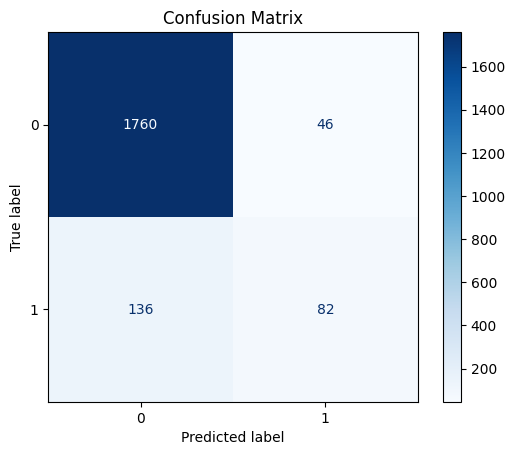

In [ ]:
cm = confusion_matrix(y_test_subset, y_pred_stacking)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=stacking_model.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()


In [ ]:
mse = mean_squared_error(y_test_subset, y_scores_stacking)
mae = mean_absolute_error(y_test_subset, y_scores_stacking)
r2 = r2_score(y_test_subset, y_scores_stacking)

print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"R^2 Score: {r2:.4f}")


Mean Squared Error (MSE): 0.0721
Mean Absolute Error (MAE): 0.1119
R^2 Score: 0.2498


Audio data

In [ ]:
from google.colab import files
uploaded = files.upload()
filename = next(iter(uploaded.keys()))


Saving veri_test.txt to veri_test (1).txt


In [ ]:
with open(filename, 'r') as file:
    content = file.read()
print(content[:1000])


1 id10270/x6uYqmx31kE/00001.wav id10270/8jEAjG6SegY/00008.wav
0 id10270/x6uYqmx31kE/00001.wav id10300/ize_eiCFEg0/00003.wav
1 id10270/x6uYqmx31kE/00001.wav id10270/GWXujl-xAVM/00017.wav
0 id10270/x6uYqmx31kE/00001.wav id10273/0OCW1HUxZyg/00001.wav
1 id10270/x6uYqmx31kE/00001.wav id10270/8jEAjG6SegY/00022.wav
0 id10270/x6uYqmx31kE/00001.wav id10284/Uzxv7Axh3Z8/00001.wav
1 id10270/x6uYqmx31kE/00001.wav id10270/GWXujl-xAVM/00033.wav
0 id10270/x6uYqmx31kE/00001.wav id10284/7yx9A0yzLYk/00029.wav
1 id10270/x6uYqmx31kE/00002.wav id10270/5r0dWxy17C8/00026.wav
0 id10270/x6uYqmx31kE/00002.wav id10285/m-uILToQ9ss/00009.wav
1 id10270/x6uYqmx31kE/00002.wav id10270/GWXujl-xAVM/00035.wav
0 id10270/x6uYqmx31kE/00002.wav id10306/uzt36PBzT2w/00001.wav
1 id10270/x6uYqmx31kE/00002.wav id10270/GWXujl-xAVM/00038.wav
0 id10270/x6uYqmx31kE/00002.wav id10307/kp_GCjLq4qA/00004.wav
1 id10270/x6uYqmx31kE/00002.wav id10270/GWXujl-xAVM/00033.wav
0 id10270/x6uYqmx31kE/00002.wav id10275/Mdk1SXywHck/00024.wav
1 id1027

In [ ]:
with open(filename, 'r') as file:
    lines = file.readlines()

# Parse the lines to extract labels and file paths
data = []
for line in lines:
    parts = line.strip().split()
    if len(parts) == 3:
        # Check if the first part is a digit before converting to int
        if parts[0].isdigit():
            label = int(parts[0])
            file1 = parts[1]
            file2 = parts[2]
            data.append((label, file1, file2))
        else:
            #Handle lines that do not start with a digit
            print(f"Skipping line: {line.strip()}")
for entry in data[:10]:
    print(f"Label: {entry[0]}, File 1: {entry[1]}, File 2: {entry[2]}")

Label: 1, File 1: id10270/x6uYqmx31kE/00001.wav, File 2: id10270/8jEAjG6SegY/00008.wav
Label: 0, File 1: id10270/x6uYqmx31kE/00001.wav, File 2: id10300/ize_eiCFEg0/00003.wav
Label: 1, File 1: id10270/x6uYqmx31kE/00001.wav, File 2: id10270/GWXujl-xAVM/00017.wav
Label: 0, File 1: id10270/x6uYqmx31kE/00001.wav, File 2: id10273/0OCW1HUxZyg/00001.wav
Label: 1, File 1: id10270/x6uYqmx31kE/00001.wav, File 2: id10270/8jEAjG6SegY/00022.wav
Label: 0, File 1: id10270/x6uYqmx31kE/00001.wav, File 2: id10284/Uzxv7Axh3Z8/00001.wav
Label: 1, File 1: id10270/x6uYqmx31kE/00001.wav, File 2: id10270/GWXujl-xAVM/00033.wav
Label: 0, File 1: id10270/x6uYqmx31kE/00001.wav, File 2: id10284/7yx9A0yzLYk/00029.wav
Label: 1, File 1: id10270/x6uYqmx31kE/00002.wav, File 2: id10270/5r0dWxy17C8/00026.wav
Label: 0, File 1: id10270/x6uYqmx31kE/00002.wav, File 2: id10285/m-uILToQ9ss/00009.wav


In [ ]:
# Count the number of pairs for each label
label_counts = Counter([entry[0] for entry in data])
print("Label Distribution:")
for label, count in label_counts.items():
    print(f"Label {label}: {count} pairs")


Label Distribution:
Label 1: 18860 pairs
Label 0: 18860 pairs


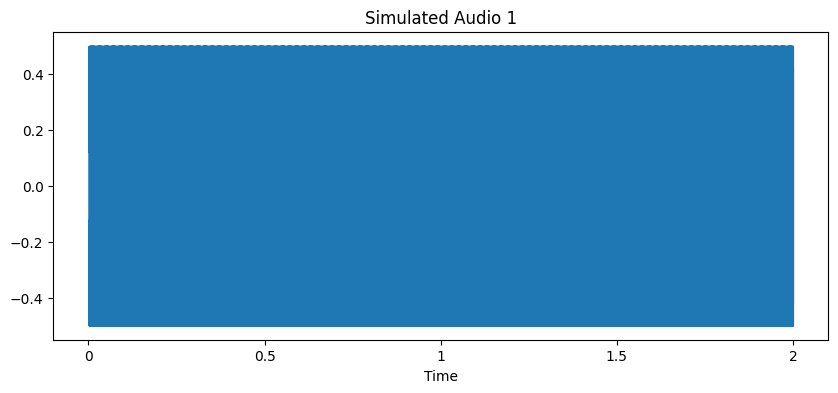

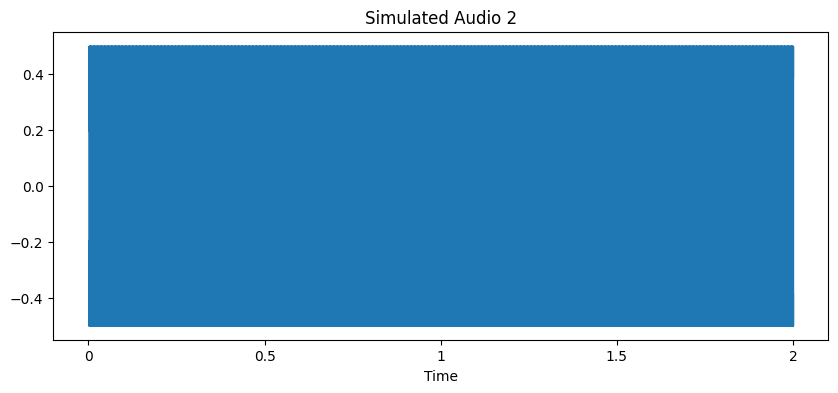

In [ ]:
# Simulate a simple sine wave as audio data
duration = 2.0  # seconds
sr = 22050  # sample rate
t = np.linspace(0, duration, int(sr*duration), endpoint=False)  # time variable
audio1 = 0.5 * np.sin(2 * np.pi * 440 * t)  # 440 Hz sine wave
audio2 = 0.5 * np.sin(2 * np.pi * 880 * t)  # 880 Hz sine wave

plt.figure(figsize=(10, 4))
librosa.display.waveshow(audio1, sr=sr)
plt.title("Simulated Audio 1")
plt.show()

plt.figure(figsize=(10, 4))
librosa.display.waveshow(audio2, sr=sr)
plt.title("Simulated Audio 2")
plt.show()


In [ ]:
def extract_mfcc_features_from_audio(audio, sr=22050, n_mfcc=13):
    # Extract MFCC features
    mfccs = librosa.feature.mfcc(y=audio, sr=sr, n_mfcc=n_mfcc)

    # Take the mean of the MFCCs over time
    mfccs_mean = np.mean(mfccs.T, axis=0)

    return mfccs_mean

# Extract MFCC features from the simulated audio
mfcc1 = extract_mfcc_features_from_audio(audio1, sr=sr)
mfcc2 = extract_mfcc_features_from_audio(audio2, sr=sr)
print("MFCC Features for Simulated Audio 1 (440 Hz):", mfcc1)
print("MFCC Features for Simulated Audio 2 (880 Hz):", mfcc2)


MFCC Features for Simulated Audio 1 (440 Hz): [-472.25913052   45.31627586   28.60190647   14.05082479   -2.08821088
  -17.7383264   -29.93083318  -37.01441355  -37.94689243  -32.67916226
  -22.33642685   -8.80620593    5.65364321]
MFCC Features for Simulated Audio 2 (880 Hz): [-468.08403297   38.8578967    -4.72524348  -36.87563659  -45.52692486
  -25.04154369   10.41768143   37.91417778   40.3907119    17.29147691
  -15.51354246  -36.85304073  -33.87881769]


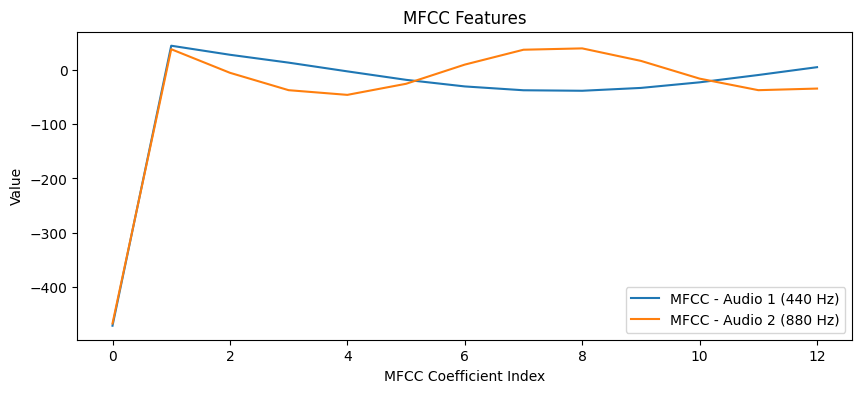

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 4))
plt.plot(mfcc1, label='MFCC - Audio 1 (440 Hz)')
plt.plot(mfcc2, label='MFCC - Audio 2 (880 Hz)')
plt.title('MFCC Features')
plt.xlabel('MFCC Coefficient Index')
plt.ylabel('Value')
plt.legend()
plt.show()


In [ ]:
labels = [0, 1, 0, 1]

# Create a dataset of MFCC features
X = np.array([
    np.concatenate([mfcc1, mfcc2]),  # Simulated pair 1
    np.concatenate([mfcc2, mfcc1]),  # Simulated pair 2
    np.concatenate([mfcc1, mfcc1]),  # Simulated pair 3
    np.concatenate([mfcc2, mfcc2])   # Simulated pair 4
])
y = np.array(labels)

print("Dataset shape:", X.shape)
print("Labels:", y)


Dataset shape: (4, 26)
Labels: [0 1 0 1]


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

           1       1.00      1.00      1.00         1

    accuracy                           1.00         1
   macro avg       1.00      1.00      1.00         1
weighted avg       1.00      1.00      1.00         1



In [ ]:
# Since MultinomialNB expects non-negative features, we need to scale the data
scaler = MinMaxScaler()

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

#Scale the training and testing data separately
X_train = scaler.fit_transform(X_train) #Fit the scaler on training data and transform it
X_test = scaler.transform(X_test) #Use the same scaler to transform the test data

# Initialize the Multinomial Naive Bayes model
nb_model = MultinomialNB()

# Train the model
nb_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_nb = nb_model.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred_nb))
print("Classification Report:\n", classification_report(y_test, y_pred_nb))

Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

           1       1.00      1.00      1.00         1

    accuracy                           1.00         1
   macro avg       1.00      1.00      1.00         1
weighted avg       1.00      1.00      1.00         1



In [ ]:
# Perform 2-fold cross-validation
cv_scores = cross_val_score(nb_model, X_scaled, y, cv=2)
print("Cross-Validation Scores:", cv_scores)
print("Mean Cross-Validation Score:", np.mean(cv_scores))


Cross-Validation Scores: [0.5 1. ]
Mean Cross-Validation Score: 0.75


In [ ]:
import joblib
# Save the model to a file
joblib.dump(nb_model, 'fraud_detection_model.pkl')


['fraud_detection_model.pkl']

In [2]:
import joblib
model = joblib.load('fraud_detection_model.pkl')


In [ ]:
#Predict using the loaded model
sample_data = X_test[0].reshape(1, -1)
prediction = model.predict(sample_data)

print("Prediction:", prediction)


Prediction: [1]


In [ ]:
!pip install librosa numpy


In [ ]:
import librosa
import librosa.display
import matplotlib.pyplot as plt

# Load an example audio file
file_path = 'path_to_your_audio_file.wav'
# Load the audio file
audio, sr = librosa.load(file_path, sr=None)

# Display some basic information about the audio file
print(f"Sampling Rate: {sr}")
print(f"Audio Duration: {librosa.get_duration(y=audio, sr=sr)} seconds")
print(f"Number of Samples: {len(audio)}")

# Plot the waveform
plt.figure(figsize=(10, 4))
librosa.display.waveshow(audio, sr=sr)
plt.title(f"Waveform of {file_path}")
plt.show()


In [4]:
!pip install flask-ngrok


In [ ]:
from flask import Flask, request, jsonify
from flask_ngrok import run_with_ngrok

app = Flask(__name__)
run_with_ngrok(app)  # Start ngrok when the app is run

# Load your model here
model = joblib.load('fraud_detection_model.pkl')

@app.route("/predict", methods=['POST'])
def predict():
    data = request.json
    features = extract_features(data)  # Define how to extract features
    prediction = model.predict([features])
    return jsonify({'prediction': int(prediction[0])})

if __name__ == "__main__":
    app.run()
